In [1]:
!pip install numpy pandas matplotlib topsispy


  Using cached numpy-2.4.1-cp313-cp313-win_amd64.whl.metadata (6.6 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached numpy-2.4.1-cp313-cp313-win_amd64.whl (12.3 MB)
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.7 MB 7.3 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.7 MB 9.1 MB/s eta 0:00:01
   --------- ------------------------------ 2.4/9.7 MB 9.1 MB/s eta 0:00:01
   --------- ------------------------------ 2.4/9.7 MB 9.1 MB/s eta 0:00:01
   --------- ------------------------------ 2.4/9.7 MB 9.1 MB/s eta 0:00:01
   ---------- ----------------------------- 2.6/9.7 MB 2.1 MB/s eta 0:00:04
   -------------- ------------------------- 3.4/9.7 MB 2.3 MB/s eta 0:00:03
   ------------------ --------------------- 4.5/9.7 MB 2.9 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.7 MB 2.9 

ERROR: Exception:
Traceback (most recent call last):
  File "E:\College Study Material\Predictive Analysis\assignments\A5\.venv\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "E:\College Study Material\Predictive Analysis\assignments\A5\.venv\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ~~~~~~~~~~~~~^^^^^
  File "E:\College Study Material\Predictive Analysis\assignments\A5\.venv\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ~~~~~~~~~~~~~^^^^^
  File "E:\College Study Material\Predictive Analysis\assignments\A5\.venv\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ~~~~~~~~~~~~~~^^^^^
  File "C:\Users\shabd\AppData\Local\Programs\Python\Python313\Lib\http\cl

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
DOMAIN = "News Article Text Generation"
print("Domain selected:", DOMAIN)


Domain selected: News Article Text Generation


In [5]:
models = [
    "GPT-2",
    "GPT-Neo",
    "T5",
    "BART-Large",
    "XLNet"
]


In [6]:
data = {
    "Perplexity": [35, 28, 32, 26, 30],        # Minimize
    "BLEU": [21, 25, 23, 27, 24],              # Maximize
    "ROUGE": [23, 27, 25, 30, 26],             # Maximize
    "Inference_Time": [120, 200, 150, 180, 210],  # Minimize (ms)
    "Model_Size": [500, 2500, 900, 1600, 1200],   # Minimize (MB)
    "Human_Score": [7.8, 8.4, 8.0, 8.6, 8.2]    # Maximize
}

df = pd.DataFrame(data, index=models)
df

,Perplexity,BLEU,ROUGE,Inference_Time,Model_Size,Human_Score
GPT-2,35,21,23,120,500,7.8
GPT-Neo,28,25,27,200,2500,8.4
T5,32,23,25,150,900,8.0
BART-Large,26,27,30,180,1600,8.6
XLNet,30,24,26,210,1200,8.2


In [7]:
criteria = {
    "Perplexity": "min",
    "BLEU": "max",
    "ROUGE": "max",
    "Inference_Time": "min",
    "Model_Size": "min",
    "Human_Score": "max"
}


In [8]:
weights = np.array([
    0.20,  # Perplexity
    0.20,  # BLEU
    0.15,  # ROUGE
    0.10,  # Inference Time
    0.10,  # Model Size
    0.25   # Human Score
])

print("Sum of weights:", weights.sum())


Sum of weights: 1.0


In [9]:
normalized_df = df / np.sqrt((df ** 2).sum())
normalized_df


,Perplexity,BLEU,ROUGE,Inference_Time,Model_Size,Human_Score
GPT-2,0.515543,0.389960,0.391068,0.306386,0.148675,0.425145
GPT-Neo,0.412434,0.464238,0.459080,0.510643,0.743376,0.457849
T5,0.471353,0.427099,0.425074,0.382982,0.267615,0.436047
BART-Large,0.382975,0.501377,0.510089,0.459579,0.475761,0.468750
XLNet,0.441894,0.445669,0.442077,0.536175,0.356821,0.446948


In [10]:
weighted_df = normalized_df * weights
weighted_df


,Perplexity,BLEU,ROUGE,Inference_Time,Model_Size,Human_Score
GPT-2,0.103109,0.077992,0.058660,0.030639,0.014868,0.106286
GPT-Neo,0.082487,0.092848,0.068862,0.051064,0.074338,0.114462
T5,0.094271,0.085420,0.063761,0.038298,0.026762,0.109012
BART-Large,0.076595,0.100275,0.076513,0.045958,0.047576,0.117188
XLNet,0.088379,0.089134,0.066312,0.053618,0.035682,0.111737


In [11]:
ideal_best = []
ideal_worst = []

for col in weighted_df.columns:
    if criteria[col] == "max":
        ideal_best.append(weighted_df[col].max())
        ideal_worst.append(weighted_df[col].min())
    else:
        ideal_best.append(weighted_df[col].min())
        ideal_worst.append(weighted_df[col].max())

ideal_best = np.array(ideal_best)
ideal_worst = np.array(ideal_worst)


In [12]:
distance_best = np.sqrt(((weighted_df - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((weighted_df - ideal_worst) ** 2).sum(axis=1))


In [13]:
topsis_score = distance_worst / (distance_best + distance_worst)

results = pd.DataFrame({
    "TOPSIS Score": topsis_score,
    "Rank": topsis_score.rank(ascending=False)
}, index=models).sort_values("Rank")

results


,TOPSIS Score,Rank
T5,0.624590,1.0
GPT-2,0.611759,2.0
BART-Large,0.576225,3.0
XLNet,0.543409,4.0
GPT-Neo,0.309203,5.0


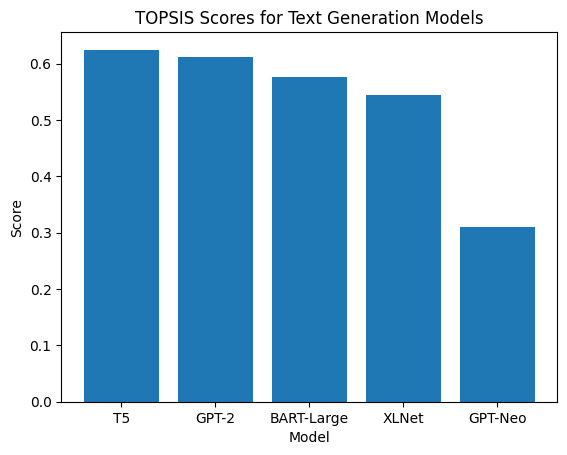

In [14]:
plt.figure()
plt.bar(results.index, results["TOPSIS Score"])
plt.title("TOPSIS Scores for Text Generation Models")
plt.xlabel("Model")
plt.ylabel("Score")
plt.show()


In [15]:
best_model = results.index[0]
print(f"Best pre-trained model for text generation using TOPSIS: {best_model}")


Best pre-trained model for text generation using TOPSIS: T5
